# **Análisis de Sentimiento y Modelos de Clasificación para Determinar su Generalización en Googlemaps**

# **I. Análisis de Sentimiento con VADER**

# **I.1 Cargamos datasets y exploramos las columnas de los mismos**

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [279]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [280]:
df = pd.read_csv('/content/drive/MyDrive/Otros/googlemaps_review_florida.csv', lineterminator='\n')

In [281]:
df.iloc[0]

Unnamed: 0                                                    0
user_id                                 101471856155148713984.0
name                                            Julie A. Gerber
Date                                                 2021-08-03
Hour                                            15:07:30.740000
rating                                                        1
text          Update: Their “reply” to my review amounted to...
pics                                                         No
gmap_id                   0x8893863ea87bd5dd:0x9383ebf973e74abb
resp_text     Thank you for the feedback. We would like to w...
resp_time                            2021-07-23 12:19:59.532000
Name: 0, dtype: object

In [282]:
df.shape

(2730604, 11)

In [283]:
df['text'].iloc[0]

'Update: Their “reply” to my review amounted to nothing. They never followed up with me. This doctor has left me without medication and not enough time to find a new doctor and get my prescriptions refilled because I came down with COVID. I have been abandoned with no recourse. I will be calling the state to file a complaint and will not drop this. Having to reschedule two to three appointments (appointments were not back to back as I was accused) over the course of two years (with more than twenty four hours notice) is NOT grounds to abandon your patients. I’m still fuming over the male at the front desk who laughed like a hyena when I questioned why I was being dropped. Steer clear of this place.\n\nUPDATE: I followed their link and submitted report. I’ll update here if anything comes from it. Forgot to mention, I was told I missed three appointments in a row by the laughing man on staff. It isn’t true. I missed one because I had been sick and needed labs done before my appointment. 

In [284]:
df_b = pd.read_csv('/content/drive/MyDrive/Otros/googlemaps_metadata_sitios_florida.csv')

In [285]:
df_b.iloc[0]

name                                              Cape Seafood Shack
address            Cape Seafood Shack, 603 Del Prado Blvd S, Cape...
gmap_id                        0x88db4147b1d9e6f3:0x943dbd10a92ba1b1
description                                                      NaN
latitude                                                   26.641377
longitude                                                 -81.940545
category                                                  Restaurant
avg_rating                                                       5.0
num_of_reviews                                                     1
price                                                             $$
hours                                                            NaN
state                                                            NaN
city                                                      Cape Coral
states                                                            FL
postal_code                       

In [286]:
df_b.shape

(6363, 30)

In [287]:
df_ml = df.merge(df_b, on='gmap_id')

In [288]:
df_ml.shape

(124750, 40)

In [289]:
df_ml.dropna()
df_ml.drop_duplicates()

,Unnamed: 0,user_id,name_x,Date,Hour,rating,text,pics,gmap_id,resp_text,...,Crowd,Atmosphere,Amenities,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday
0,514,1.130683e+20,Edwin Ashurst,2018-09-17,14:51:08.022000,5,The salads were lackluster though with well wr...,No,0x8894b5a7a7909725:0xe4687299fd288188,NaN,...,NaN,NaN,NaN,5–9PM,5–10PM,5–10PM,5–9PM,Closed,Closed,5–9PM
1,515,1.059416e+20,Douglas Gummere,2018-09-20,00:12:47.631000,1,"Love this place. Great little restaurant, with...",No,0x8894b5a7a7909725:0xe4687299fd288188,NaN,...,NaN,NaN,NaN,5–9PM,5–10PM,5–10PM,5–9PM,Closed,Closed,5–9PM
2,516,1.098577e+20,David Powell,2018-08-22,11:13:16.392000,5,A classy restaurant to match the charm of the ...,No,0x8894b5a7a7909725:0xe4687299fd288188,NaN,...,NaN,NaN,NaN,5–9PM,5–10PM,5–10PM,5–9PM,Closed,Closed,5–9PM
3,517,1.147377e+20,Hillary Hutchins,2019-04-17,01:25:32.274000,5,Great atmosphere and good food,No,0x8894b5a7a7909725:0xe4687299fd288188,NaN,...,NaN,NaN,NaN,5–9PM,5–10PM,5–10PM,5–9PM,Closed,Closed,5–9PM
4,518,1.089870e+20,Ajay patel,2019-05-20,22:42:50.993000,5,Good food,No,0x8894b5a7a7909725:0xe4687299fd288188,NaN,...,NaN,NaN,NaN,5–9PM,5–10PM,5–10PM,5–9PM,Closed,Closed,5–9PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124745,2833496,1.111539e+20,Monica B,2021-03-03,20:13:41.415000,3,"Really good prices and variety to choose from,...",Si,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,"Monica B,\nI'm glad your son enjoyed his burge...",...,"Family-friendly, Groups",Casual,Good for kids,12–9PM,12–9PM,12–9PM,12–9PM,Closed,12–9PM,12–9PM
124746,2833497,1.058293e+20,Latonshia Smith,2021-03-05,00:57:10.109000,5,I have tried a few things and everything I got...,No,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,NaN,...,"Family-friendly, Groups",Casual,Good for kids,12–9PM,12–9PM,12–9PM,12–9PM,Closed,12–9PM,12–9PM
124747,2833498,1.148710e+20,Alexander Dunn,2021-05-16,14:50:59.168000,5,"Greatest of restaurants, good place to eat!!!",No,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,NaN,...,"Family-friendly, Groups",Casual,Good for kids,12–9PM,12–9PM,12–9PM,12–9PM,Closed,12–9PM,12–9PM
124748,2833499,1.154891e+20,ACT Tech,2021-05-05,19:18:41.459000,5,"Great food, staff is amazing.",No,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,NaN,...,"Family-friendly, Groups",Casual,Good for kids,12–9PM,12–9PM,12–9PM,12–9PM,Closed,12–9PM,12–9PM


In [290]:
df_ml.iloc[0]

Unnamed: 0                                                       514
user_id                                      113068308323231432704.0
name_x                                                 Edwin Ashurst
Date                                                      2018-09-17
Hour                                                 14:51:08.022000
rating                                                             5
text               The salads were lackluster though with well wr...
pics                                                              No
gmap_id                        0x8894b5a7a7909725:0xe4687299fd288188
resp_text                                                        NaN
resp_time                                                        NaN
name_y             Gormley's on the river | Modern cuisine in his...
address            Gormley's on the river | Modern cuisine in his...
description                                                      NaN
latitude                          

In [291]:
df_ml.columns

Index(['Unnamed: 0', 'user_id', 'name_x', 'Date', 'Hour', 'rating', 'text',
       'pics', 'gmap_id', 'resp_text', 'resp_time', 'name_y', 'address',
       'description', 'latitude', 'longitude', 'category', 'avg_rating',
       'num_of_reviews', 'price', 'hours', 'state', 'city', 'states',
       'postal_code', 'Service options', 'Popular for', 'Accessibility',
       'Offerings', 'Dining options', 'Crowd', 'Atmosphere', 'Amenities',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [292]:
df_ml = df_ml[['gmap_id','rating','city', 'states','text']]
df_ml

,gmap_id,rating,city,states,text
0,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,The salads were lackluster though with well wr...
1,0x8894b5a7a7909725:0xe4687299fd288188,1,Apalachicola,FL,"Love this place. Great little restaurant, with..."
2,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,A classy restaurant to match the charm of the ...
3,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,Great atmosphere and good food
4,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,Good food
...,...,...,...,...,...
124745,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,3,Lake Alfred,FL,"Really good prices and variety to choose from,..."
124746,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,I have tried a few things and everything I got...
124747,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,"Greatest of restaurants, good place to eat!!!"
124748,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,"Great food, staff is amazing."


In [ ]:
# De lo observado arriba aplicamos una funcion que halle el len de cada fila solo en el caso de que sea 'str' formato

def get_length(text):
    if isinstance(text, str):
        return len(text)
    else:
        return 0

# aplicamos funcion
df_ml['length'] = df_ml['text'].apply(get_length)
df_ml.head()

In [294]:
df_ml['length'].describe()

count    124750.000000
mean         79.292994
std         162.629744
min           0.000000
25%           0.000000
50%          23.000000
75%          89.000000
max        5100.000000
Name: length, dtype: float64

# **I.2 Creamos histogramas, instalamos dependencias necesarias, etiquetamos la columna compound y obtenemos insights del análisis de sentimientos**

## Histograma 1: Numero de caracteres por registro

<Axes: ylabel='Frequency'>

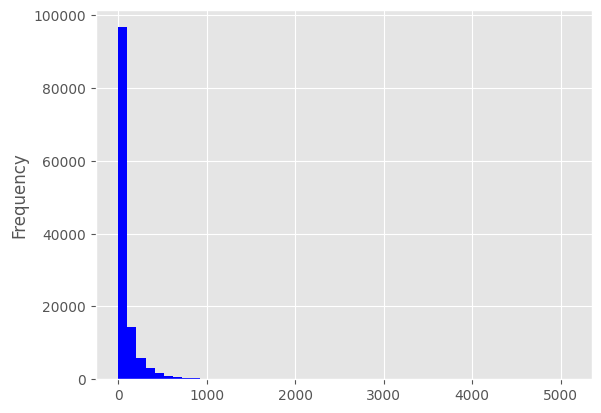

In [295]:
df_ml['length'].plot(bins=50, kind='hist', color='Blue')

La mayoria de clientes expresan sus opiniones con menos de 500 caracteres. El numero maximo de caracteres significativos son 1000.

In [296]:
df_ml = df_ml.copy()
df_ml.iloc[0]

gmap_id                0x8894b5a7a7909725:0xe4687299fd288188
rating                                                     5
city                                            Apalachicola
states                                                    FL
text       The salads were lackluster though with well wr...
length                                                   337
Name: 0, dtype: object

In [297]:
df_ml['rating'].value_counts().sort_index()

1     9035
2     5433
3    13059
4    25027
5    72196
Name: rating, dtype: int64

## Histograma 2: Número de reviews por estrellas

<Axes: title={'center': 'Count of Reviews by Rating'}>

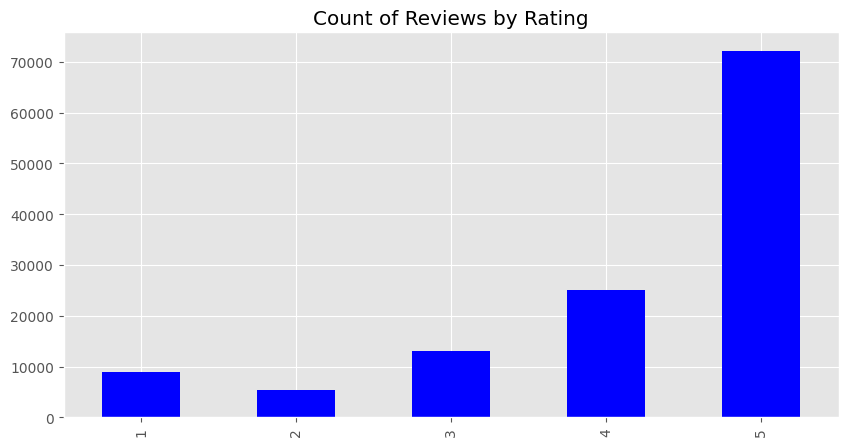

In [342]:
df_ml['rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Rating',
                                                  figsize=(10,5), color='Blue')

Instalamos dependencias

In [299]:
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

#tokenized = nltk.word_tokenize(sample)
#tokenized[:5]
#tagged = nltk.pos_tag(tokenized)
#tagged[:5]
#sentences = nltk.chunk.ne_chunk(tagged)
#sentences.pprint()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [300]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [301]:
senia = SentimentIntensityAnalyzer()

In [302]:
# Creamos nuestra muestra de una registro para probar el modelo VADER
#if isinstance(text, str):
#  text

sample = df_ml['text'].iloc[39]
sample

'Ordering online was super easy! Unfortunately the staff paid no attention to my order. I asked for veggies I did not receive. I PAID for DOUBLE meat, which I also did not receive. When I went back in to address my order, had a wait not due to customers in line but on the phone, who also seemed to be complaining.'

In [303]:
senia.polarity_scores(sample)

{'neg': 0.096, 'neu': 0.831, 'pos': 0.073, 'compound': -0.1007}

In [304]:
#df_ml = df_ml[:100000] # TRUNCAMOS LOS REGISTROS

In [305]:
df_ml.drop_duplicates()

,gmap_id,rating,city,states,text,length
0,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,The salads were lackluster though with well wr...,337
1,0x8894b5a7a7909725:0xe4687299fd288188,1,Apalachicola,FL,"Love this place. Great little restaurant, with...",91
2,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,A classy restaurant to match the charm of the ...,101
3,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,Great atmosphere and good food,30
4,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,Good food,9
...,...,...,...,...,...,...
124745,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,3,Lake Alfred,FL,"Really good prices and variety to choose from,...",190
124746,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,I have tried a few things and everything I got...,141
124747,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,"Greatest of restaurants, good place to eat!!!",45
124748,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,"Great food, staff is amazing.",29


In [306]:
df_ml = df_ml.rename_axis('id', axis=1)
#df_ml
df_ml = df_ml.reset_index().rename(columns={'index':'id'})
#df_ml.head(3)

## Aplicamos VADER a toda la columna text

In [ ]:
results_df = pd.DataFrame(columns=['id', 'compound', 'neg', 'neu', 'pos'])

for i, row in tqdm(df_ml.iterrows(), total=len(df_ml)):
    text = row['text']
    theid = row['id']

    # Verificamos si el valor de 'text' value es 'str' antes de aplicar polarity_scores
    if isinstance(text, str):
        scores = senia.polarity_scores(text)
        # Append the results to the DataFrame
        results_df = results_df.append({'id': theid, 'compound': scores['compound'], 'neg': scores['neg'], 'neu': scores['neu'], 'pos': scores['pos']}, ignore_index=True)

results_df

In [308]:
results_df

,id,compound,neg,neu,pos
0,0.0,0.9576,0.02,0.699,0.281
1,1.0,0.9186,0.00,0.455,0.545
2,2.0,0.6808,0.00,0.714,0.286
3,3.0,0.7906,0.00,0.300,0.700
4,4.0,0.4404,0.00,0.256,0.744
...,...,...,...,...,...
75133,124745.0,0.8955,0.00,0.688,0.312
75134,124746.0,0.7650,0.00,0.784,0.216
75135,124747.0,0.8392,0.00,0.385,0.615
75136,124748.0,0.8360,0.00,0.275,0.725


## Hacemos un join de los resultados con la tabla df_ml

In [309]:
merged_vader = pd.merge(df_ml, results_df, on='id', how='inner')
merged_vader

,id,gmap_id,rating,city,states,text,length,compound,neg,neu,pos
0,0,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,The salads were lackluster though with well wr...,337,0.9576,0.02,0.699,0.281
1,1,0x8894b5a7a7909725:0xe4687299fd288188,1,Apalachicola,FL,"Love this place. Great little restaurant, with...",91,0.9186,0.00,0.455,0.545
2,2,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,A classy restaurant to match the charm of the ...,101,0.6808,0.00,0.714,0.286
3,3,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,Great atmosphere and good food,30,0.7906,0.00,0.300,0.700
4,4,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,Good food,9,0.4404,0.00,0.256,0.744
...,...,...,...,...,...,...,...,...,...,...,...
75133,124745,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,3,Lake Alfred,FL,"Really good prices and variety to choose from,...",190,0.8955,0.00,0.688,0.312
75134,124746,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,I have tried a few things and everything I got...,141,0.7650,0.00,0.784,0.216
75135,124747,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,"Greatest of restaurants, good place to eat!!!",45,0.8392,0.00,0.385,0.615
75136,124748,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,"Great food, staff is amazing.",29,0.8360,0.00,0.275,0.725


## Etiquetamos los resultados generados por VADER

En la columna compound los valores mayores a 0 son feedback positivos(1) y los valores menores o iguales a cero son feedbacks negativos (0).

In [310]:
#merged_vader['feedback'] = 0

merged_vader.loc[merged_vader['compound'] > 0.0000, 'feedback'] = 1

merged_vader.loc[merged_vader['compound'] <= 0.0000, 'feedback'] = 0

In [311]:
merged_vader = merged_vader.copy()
merged_vader

,id,gmap_id,rating,city,states,text,length,compound,neg,neu,pos,feedback
0,0,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,The salads were lackluster though with well wr...,337,0.9576,0.02,0.699,0.281,1.0
1,1,0x8894b5a7a7909725:0xe4687299fd288188,1,Apalachicola,FL,"Love this place. Great little restaurant, with...",91,0.9186,0.00,0.455,0.545,1.0
2,2,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,A classy restaurant to match the charm of the ...,101,0.6808,0.00,0.714,0.286,1.0
3,3,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,Great atmosphere and good food,30,0.7906,0.00,0.300,0.700,1.0
4,4,0x8894b5a7a7909725:0xe4687299fd288188,5,Apalachicola,FL,Good food,9,0.4404,0.00,0.256,0.744,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75133,124745,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,3,Lake Alfred,FL,"Really good prices and variety to choose from,...",190,0.8955,0.00,0.688,0.312,1.0
75134,124746,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,I have tried a few things and everything I got...,141,0.7650,0.00,0.784,0.216,1.0
75135,124747,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,"Greatest of restaurants, good place to eat!!!",45,0.8392,0.00,0.385,0.615,1.0
75136,124748,0x88dd6d2bdb3f72d3:0xedb51d8cd0bb01d,5,Lake Alfred,FL,"Great food, staff is amazing.",29,0.8360,0.00,0.275,0.725,1.0


In [312]:
#merged_vader.drop(columns=['text','length'], inplace=True)
merged_vader.to_csv('/content/drive/MyDrive/Otros/googlemaps_review_analisis_sentimiento.csv')

# Histograma 3: Distribucion de Etiquetas por Numero de Caracteres

array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

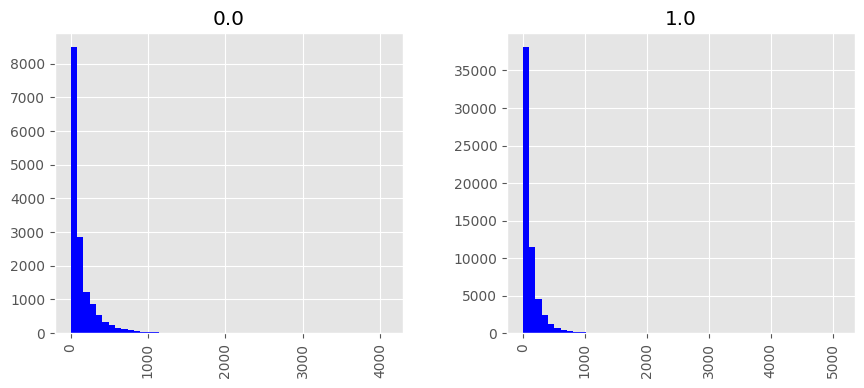

In [338]:
merged_vader.hist(column='length', by='feedback', bins=50, figsize=(10,4), color='Blue')

Del histograma podemos ver que las etiquetas (0, 1) estan desbalanceadas, lo que sugiere realizar un cros validation mad adelante.

In [314]:
city_scores = merged_vader.groupby('city')['compound'].mean().reset_index()

city_scores = city_scores.sort_values(by='compound', ascending=False)

city_scores

,city,compound
95,Lake Alfred,0.880854
25,Cedar Key,0.869550
79,Holmes Beach,0.845506
83,Interlachen,0.826292
210,Tequesta,0.815120
...,...,...
106,Lauderdale Lakes,0.239505
229,Winter Haven,0.225295
110,Lighthouse Point,0.185020
225,Williston,0.131145


# Histograma 4: Relacion entre score compound y rating

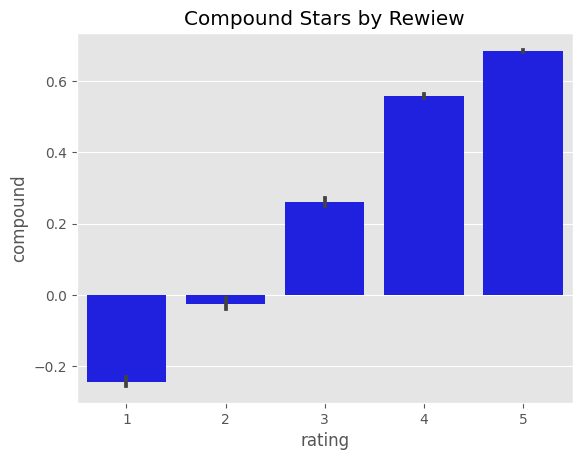

In [339]:
ax = sns.barplot(data=merged_vader, x='rating', y='compound', color='Blue')
ax.set_title("Compound Stars by Rewiew")
plt.show()

# Histograma 5: Relacion entre rating y scores (positive, neutral y negative)

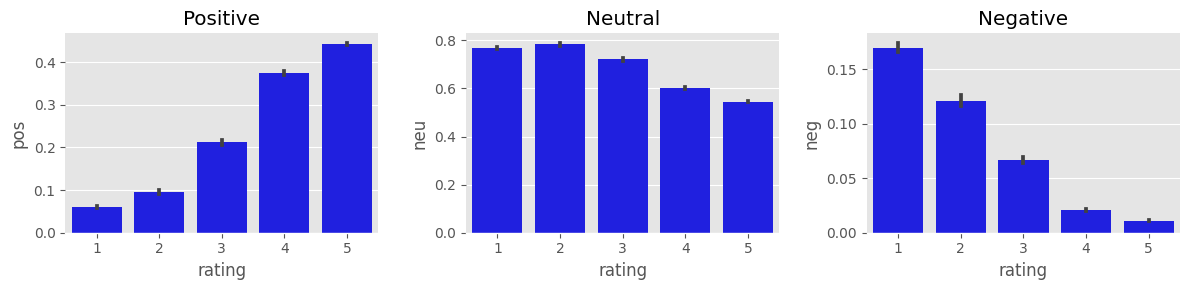

In [340]:
palettese = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"]

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.set_palette(palettese)
sns.barplot(data=merged_vader, x='rating', y='pos', ax=axs[0], color='Blue')
sns.barplot(data=merged_vader, x='rating', y='neu', ax=axs[1], color='Blue')
sns.barplot(data=merged_vader, x='rating', y='neg', ax=axs[2], color='Blue')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

sns.despine(left=True, right=True)
plt.tight_layout()
plt.show()

In [317]:
# Sentimiento positivo: El score mas positivo (vader no esta entrenado para diferenciar el sarcasmo)

# De acuerdo al feedback

merged_vader.query('feedback == 1').sort_values('pos', ascending=False)['text'].values[0]

'Nice'

In [318]:
# De acuerdo al rating

merged_vader.query('rating == 5').sort_values('pos', ascending=False)['text'].values[0]

'Good'

In [319]:
# Sentimiento negativo: score mas negativo

# De acuerdo a feedback

merged_vader.query('feedback == 0').sort_values('neg', ascending=False)['text'].values[0]


'Rude'

In [320]:
# De acuerdo al rating

merged_vader.query('rating == 1').sort_values('neg', ascending=False)['text'].values[0]

'Terrible'

# **II. Modelos de Clasificacion**

Preprocesamos los datos

In [321]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import (train_test_split,
                                     TimeSeriesSplit,
                                     KFold,
                                     StratifiedKFold,
                                     GroupKFold,
                                     StratifiedGroupKFold,)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

corpus = [preprocess_text(text) for text in merged_vader['text']]

cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()  # This works like FEATURES!!
y = merged_vader['feedback'].values  # This is my TARGET!



## Dividiendo nuestros datos en datos de entrenamiento(train data) y datos de prueba (holdout_data)

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## **II.1 Randomforestclassifier**

In [323]:
# Fit the Random Forest classifier to the Training set
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)


array([[ 2355,   709],
       [  370, 11594]])

In [324]:
# ACCURACY en el modelo de entrenamiento
y_pred_train = classifier.predict(X_train)
y_pred_train_probability = classifier.predict_proba(X_train)[:,1] # Este ultimo termino porque predict_proba da las probabilidades de 0 y 1(etiquetas), queremos el segundo


acc_score = accuracy_score(y_train, y_pred_train)
auc_score = roc_auc_score(y_train, y_pred_train_probability)

print(f'El score del training set  en ACCURACY is: {acc_score:0.4f} y AUC de  {auc_score:0.4f}')

El score del training set  en ACCURACY is: 0.9947 y AUC de  0.9964


In [325]:
# EN MODELO DE TEST (SI PUSIERAMOS EN PRODUCCION)

y_pred_test = classifier.predict(X_test)
y_pred_test_probability = classifier.predict_proba(X_test)[:,1] # Este ultimo termino porque predict_proba da las probabilidades de 0 y 1, queremos el segundo


acc_score = accuracy_score(y_test, y_pred_test)
auc_score = roc_auc_score(y_test, y_pred_test_probability)

print(f'El score del training set  en ACCURACY is: {acc_score:0.4f} y AUC de  {auc_score:0.4f}')

El score del training set  en ACCURACY is: 0.9282 y AUC de  0.9513


In [326]:
# LINEA BASE

accuracy_score(y_test, np.zeros_like(y_test)), roc_auc_score(y_test, np.zeros_like(y_test))


(0.20388607931860528, 0.5)

El accuracy del modelo test(produccion) es 92.82% mayor q el accuracy de linea base 20.39% y su AUC de 95.13% (lo que predice es correcto) es mejor q 0.5(a este nivel predice de manera random) del modelo linea base  por tanto el modelo predice bien en un 92.82% de los casos.

# **II.1.1 Reporte de classificacion sin cross validation para Randomforestclassifier**
 **accuracy, precision, recall, and F1-score**

In [327]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = y_test

accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred)

recall = recall_score(y_true, y_pred)

f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:0.4f} nivel de predicciones correctas (del total de predicciones).")
print(f"Precision: {precision:0.4f} nivel de identificacion de SÓLO elementos relevantes(de true positive y false positive).")
print(f"Recall: {recall:0.4f} nivel elementos relevantes seleccionados en la muestra(Dentro de todos los positivos(true positives and false negatives)).") # the number of true positives divided by the number of true positives plus the number of false negatives
print(f"F1-score: {f1:0.4f} nivel de performance del modelo sobre la muestra (1 indica excelente precision y recall del modelo).")


[[ 2355   709]
 [  370 11594]]
Accuracy: 0.9282 nivel de predicciones correctas (del total de predicciones).
Precision: 0.9424 nivel de identificacion de SÓLO elementos relevantes(de true positive y false positive).
Recall: 0.9691 nivel elementos relevantes seleccionados en la muestra(Dentro de todos los positivos(true positives and false negatives)).
F1-score: 0.9555 nivel de performance del modelo sobre la muestra (1 indica excelente precision y recall del modelo).


# **II.1.2 Cross Validation para Randomforestclassifier**

In [328]:
# X e y son NumPy arrays!!
X_d = pd.DataFrame(X) # Convertimos X a DataFrame
y_s = pd.Series(y)  # Convertimos y a Series

# Instanciamos StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 0
aucs = []

for train_idx, test_idx in skf.split(X_d, y_s):
    X_train = X_d.loc[train_idx]
    y_train = y_s[train_idx]  # Usar y_s como Series aqui

    X_test = X_d.loc[test_idx]
    y_test = y_s[test_idx]

    clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
    clf.fit(X_train, y_train)

    # Let's PREDICT on the test set
    pred = clf.predict(X_test)
    pred_prob = clf.predict_proba(X_test)[:, 1]

    acc_score = accuracy_score(y_test, pred)
    auc_score = roc_auc_score(y_test, pred_prob)

    print(f'==========Fold {fold} ==========')
    print(f'Test set ACCURACY: {acc_score:0.4f} and AUC: {auc_score:0.4f}')

    fold += 1
    aucs.append(auc_score)
mean_fold_auc = np.mean(aucs)
print(f'La MEDIA AUC es: {mean_fold_auc:0.4f}')

==========Fold 0 ==========
Test set ACCURACY: 0.9304 and AUC: 0.9511
==========Fold 1 ==========
Test set ACCURACY: 0.9302 and AUC: 0.9533
==========Fold 2 ==========
Test set ACCURACY: 0.9310 and AUC: 0.9533
==========Fold 3 ==========
Test set ACCURACY: 0.9273 and AUC: 0.9538
==========Fold 4 ==========
Test set ACCURACY: 0.9313 and AUC: 0.9505
La MEDIA AUC es: 0.9524


## **II.2 LGBMClassifier**

In [329]:
#pip install lightgbm

In [330]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=100)
clf.fit(X,y)

# let's PREDICT on training set

pred = clf.predict(X_train)
pred_prob = clf.predict_proba(X_train)

[LightGBM] [Info] Number of positive: 59980, number of negative: 15158
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.414352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6162
[LightGBM] [Info] Number of data points in the train set: 75138, number of used features: 1500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798265 -> initscore=1.375483
[LightGBM] [Info] Start training from score 1.375483


In [331]:
# We just want to find the probabilities of positive cases (1)

pred_prob = clf.predict_proba(X_train)[:,1]

In [332]:
pred_prob

array([0.99298822, 0.98732237, 0.21721664, ..., 0.98789795, 0.9248644 ,
       0.98301628])

In [333]:
acc_score = accuracy_score(y_train, pred)
auc_score = roc_auc_score(y_train, pred_prob)

print(f'El score del training set  en ACCURACY is: {acc_score:0.4f} y AUC de  {auc_score:0.4f}')

El score del training set  en ACCURACY is: 0.9391 y AUC de  0.9624


In [334]:
  # ON TEST SET

pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)[:,1]
acc_score = accuracy_score(y_test, pred)
auc_score = roc_auc_score(y_test, pred_prob)

print(f'El score del training set  en ACCURACY is: {acc_score:0.4f} y AUC de  {auc_score:0.4f}')



El score del training set  en ACCURACY is: 0.9391 y AUC de  0.9633


In [335]:
# Linea base

accuracy_score(y_test, np.zeros_like(y_test)), roc_auc_score(y_test, np.zeros_like(y_test))


(0.20170360018633127, 0.5)

Lo que encontramos es que el modelo aplicado a test set tiene un accuracy de 93.91% y el accuracy del modelo linea base tiene 20.17% de accuracy lo que permite concluir que el modelo test predice mejor que el linea base. Esto ultimo demuestra que la prediccion usando LGBM classifier de nuestros targets es bueno. Tambien esta conclusion es reforzada por un AUC de 0.96, lo que quiere decir que el modelo de classifica y diferencia bien bien los casos positivos de los negativos.

# **II.2.1 Reporte de classificacion sin cross validation para LGBMCLASSIFIER**

 **accuracy, precision, recall, and F1-score**

In [336]:
cm = confusion_matrix(y_test, pred)
print(cm)

y_true = y_test

accuracy = accuracy_score(y_true, pred)

precision = precision_score(y_true, pred)

recall = recall_score(y_true, pred)

f1 = f1_score(y_true, pred)

print(f"Accuracy: {accuracy:0.4f} nivel de predicciones correctas (del total de predicciones).")
print(f"Precision: {precision:0.4f} nivel de identificacion de SÓLO elementos relevantes(de true positive y false positive).")
print(f"Recall: {recall:0.4f} nivel elementos relevantes seleccionados en la muestra(Dentro de todos los positivos(true positives and false negatives)).")
print(f"F1-score: {f1:0.4f} nivel de performance del modelo sobre la muestra (1 indica excelente precision y recall del modelo).")

[[ 2482   549]
 [  366 11630]]
Accuracy: 0.9391 nivel de predicciones correctas (del total de predicciones).
Precision: 0.9549 nivel de identificacion de SÓLO elementos relevantes(de true positive y false positive).
Recall: 0.9695 nivel elementos relevantes seleccionados en la muestra(Dentro de todos los positivos(true positives and false negatives)).
F1-score: 0.9622 nivel de performance del modelo sobre la muestra (1 indica excelente precision y recall del modelo).


# **II.2.2 Cross Validation para LGBMclassifier**

In [337]:
# Assuming X_d and y_s are NumPy arrays
X_d = pd.DataFrame(X)
y_s = pd.Series(y)  # Convert y_s to a Series

# Initialize StratifiedKFold with the desired number of folds (e.g., 5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 0
aucs = []

for train_idx, test_idx in skf.split(X_d, y_s):
    X_train = X_d.loc[train_idx]
    y_train = y_s[train_idx]  # Use y_s as a Series here

    X_test = X_d.loc[test_idx]
    y_test = y_s[test_idx]  # Use y_s as a Series here

    clf = lgb.LGBMClassifier(n_estimators=100)
    clf.fit(X_train, y_train)

    # Let's PREDICT on the test set
    pred = clf.predict(X_test)
    pred_prob = clf.predict_proba(X_test)[:, 1]

    acc_score = accuracy_score(y_test, pred)
    auc_score = roc_auc_score(y_test, pred_prob)

    print(f'==========Fold {fold} ==========')
    print(f'Test set ACCURACY: {acc_score:0.4f} and AUC: {auc_score:0.4f}')

    fold += 1
    aucs.append(auc_score)
mean_fold_auc = np.mean(aucs)
print(f'La MEDIA AUC es: {mean_fold_auc:0.4f}')

[LightGBM] [Info] Number of positive: 47984, number of negative: 12126
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.133257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5987
[LightGBM] [Info] Number of data points in the train set: 60110, number of used features: 1500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798270 -> initscore=1.375516
[LightGBM] [Info] Start training from score 1.375516
==========Fold 0 ==========
Test set ACCURACY: 0.9327 and AUC: 0.9503
[LightGBM] [Info] Number of positive: 47984, number of negative: 12126
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.188286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5931
[LightGBM] [Info] Number of data po

# **III. Conclusiones**

La mayoria de opiniones acerca de restaurants son expresadas con 500 palabras o menos y la mayoria de opiniones son positivas en 3 de 5 categorias de rating por compound score(ver histograma 1, 2 y 4).

Una vez realizada la etiquetacion de los resultados de compound de VADER, se puede notar el desbalance de casos positivos (1) y casos negativos (0), lo que sesga la capacidad de prediccion de un modelo de clasificacion (ver histograma 3).

Se comprueba la relacion directa que existe (de uno a uno) entre el score compound de Vader, la relacion directa entre el score positivo, la relacion inversa entre score negativo y el rating del restaurant respectivamente (ver histograma 4 y 5).Por ejemplo, si el restaurant tiene un rating de 1 es mas probable que tenga una mala percepcion o resultado negativo en el analisis de sentimiento.

Los comentarios u opiniones(positivas o negativas) en googlemaps son mas diferenciados que en yelp, por ejemplo, en el histograma 4 la diferencia entre comentarios de 1 y 2 ratings son mucho mas diferenciados a los comentarios de 3,4 y 5 rating.

De los modelos de clasificacion usados sin realizar validacion cruzada el score de accuracy es de un 94% en promedio y el AUC promedio de 96%. Despues de realizar la validacion cruzada en promedio(teniendo en cuenta los dos modelos) se obtiene un accuracy de 93% y un AUC de 95%. Lo anterior permite concluir que si pusieramos en produccion el modelo de machine learning para predecir comentarios positivos y negativos de acuerdo a Vader, este ultimo va a producir(asignar scores positivos) un 93% de outputs correctos (opiniones que realmente son positivas) y tendra un 7%  de error en asignar scores(positivos) a los comentarios.

Comparando los resultados de yelp con los de google en terminos de accuracy, google presenta un mejor grado de prediccion de opiniones positivas en lo que respecta al valor al que un empresario/ cliente de restaurant podria acceder haciendo uso de los servicios de un restaurant. Los histogramas de ambos en cuanto al rating/stars por score compound muestran que en googlemaps se puede tener un mayor acceso a opiniones negativas tanto como positivas, lo que permite contrastar mejor que tipo de restaurants podrian ofrecer un mayor valor a los clientes y esto mismo podria ser usado para determinar mejoras en el servicio con otros datos complementarios.


